In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import hist
import awkward as ak
import vector

vector.register_awkward()

In [2]:
def add_labels(z: float)->int:
    """
    Add labels according to the z vertex positon
    """
    if -800.0 < z and z < -500.0:
        return 0 # collimeter
    if -500.0 < z and z < -305.0:
        return 1 # air1
    if -305.0 < z and z < -295.0:
        return 2 # target
    if -295.0 < z and z < 0.0:
        return 3 # air2
    if 0.0 < z and z < 250.0:
        return 4 # beam dump
    else:
        return -99 # some error check the conditions

In [3]:
tree = uproot.open("vertexml.root:tree/event")

# tree.keys()

In [4]:
data = tree.arrays(["rec_ndim", "rec_pos_trk/rec_pos_trk.charge", "rec_neg_trk/rec_neg_trk.charge",
                   "rec_pos_trk/rec_pos_trk.x1", "rec_pos_trk/rec_pos_trk.y1", "rec_pos_trk/rec_pos_trk.z1",
                   "rec_neg_trk/rec_neg_trk.x1", "rec_neg_trk/rec_neg_trk.y1", "rec_neg_trk/rec_neg_trk.z1",
                   "rec_pos_trk/rec_pos_trk.x3", "rec_pos_trk/rec_pos_trk.y3", "rec_pos_trk/rec_pos_trk.z3",
                   "rec_neg_trk/rec_neg_trk.x3", "rec_neg_trk/rec_neg_trk.y3", "rec_neg_trk/rec_neg_trk.z3",
                   "rec_pos_trk/rec_pos_trk.px1", "rec_pos_trk/rec_pos_trk.py1", "rec_pos_trk/rec_pos_trk.pz1",
                   "rec_neg_trk/rec_neg_trk.px1", "rec_neg_trk/rec_neg_trk.py1", "rec_neg_trk/rec_neg_trk.pz1",
                   "rec_pos_trk/rec_pos_trk.px3", "rec_pos_trk/rec_pos_trk.py3", "rec_pos_trk/rec_pos_trk.pz3",
                   "rec_neg_trk/rec_neg_trk.px3", "rec_neg_trk/rec_neg_trk.py3", "rec_neg_trk/rec_neg_trk.pz3",
                   "true_dim/true_dim.x", "true_dim/true_dim.y", "true_dim/true_dim.z",
                   "true_dim/true_dim.px", "true_dim/true_dim.py", "true_dim/true_dim.pz", "true_dim/true_dim.mass", 
                   "true_dim/true_dim.pt", "true_dim/true_dim.x1", "true_dim/true_dim.x2", "true_dim/true_dim.xf",
                    "true_dim/true_dim.costh", "true_dim/true_dim.phi"], library="pd")

In [5]:
data = data[data["rec_ndim"]==1]

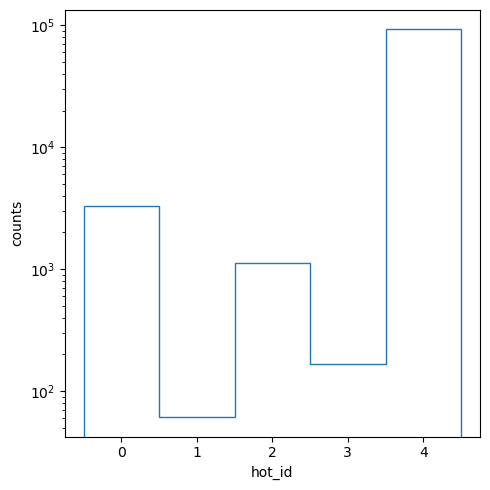

In [6]:
hot_id = data["true_dim/true_dim.z"].apply(add_labels).to_numpy()

plt.figure(figsize=(5, 5))
plt.hist(hot_id, bins=5, range=[-0.5, 4.5], histtype='step')
plt.yscale('log')
plt.xlabel('hot_id')
plt.ylabel('counts')
plt.tight_layout()
plt.show()

In [7]:
X = data[["rec_pos_trk/rec_pos_trk.charge", "rec_neg_trk/rec_neg_trk.charge",
                   "rec_pos_trk/rec_pos_trk.x1", "rec_pos_trk/rec_pos_trk.y1", "rec_pos_trk/rec_pos_trk.z1",
                   "rec_neg_trk/rec_neg_trk.x1", "rec_neg_trk/rec_neg_trk.y1", "rec_neg_trk/rec_neg_trk.z1",
                   "rec_pos_trk/rec_pos_trk.x3", "rec_pos_trk/rec_pos_trk.y3", "rec_pos_trk/rec_pos_trk.z3",
                   "rec_neg_trk/rec_neg_trk.x3", "rec_neg_trk/rec_neg_trk.y3", "rec_neg_trk/rec_neg_trk.z3",
                   "rec_pos_trk/rec_pos_trk.px1", "rec_pos_trk/rec_pos_trk.py1", "rec_pos_trk/rec_pos_trk.pz1",
                   "rec_neg_trk/rec_neg_trk.px1", "rec_neg_trk/rec_neg_trk.py1", "rec_neg_trk/rec_neg_trk.pz1",
                   "rec_pos_trk/rec_pos_trk.px3", "rec_pos_trk/rec_pos_trk.py3", "rec_pos_trk/rec_pos_trk.pz3",
                   "rec_neg_trk/rec_neg_trk.px3", "rec_neg_trk/rec_neg_trk.py3", "rec_neg_trk/rec_neg_trk.pz3"]].to_numpy()


y = data[["true_dim/true_dim.x", "true_dim/true_dim.y", "true_dim/true_dim.z",
          "true_dim/true_dim.px", "true_dim/true_dim.py", "true_dim/true_dim.pz", "true_dim/true_dim.mass",
          "true_dim/true_dim.x1", "true_dim/true_dim.x2", "true_dim/true_dim.xf", "true_dim/true_dim.costh", "true_dim/true_dim.phi"]].to_numpy()


# dimu = data[["true_dim/true_dim.mass", "true_dim/true_dim.pt", "true_dim/true_dim.x1", "true_dim/true_dim.x2", "true_dim/true_dim.xf",
             # "true_dim/true_dim.costh", "true_dim/true_dim.phi"]].to_numpy()

In [8]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
hot_id = ohe.fit_transform(hot_id.reshape(-1, 1))

In [9]:
from sklearn.model_selection import train_test_split

# train, validate test split
X_train_val, X_test, y_train_val, y_test, hotid_train_val, hotid_test = train_test_split(X, y, hot_id,
                                                                                         test_size=0.2, shuffle=True)
X_train, X_valid, y_train, y_valid, hotid_train, hotid_valid = train_test_split(X_train_val, y_train_val, hotid_train_val,
                                                                                test_size=0.25, shuffle=True)

In [10]:
y_train = y_train[:, :7]

y_valid = y_valid[:, :7]

In [11]:
from model import vertexTag, vertexReg, vertexMLP, dimuNet

# net = vertexMLP(in_features=26, vert_dim=7, hidden_dim1=50, hidden_dim2=50)

net = dimuNet()

net

dimuNet(
  (tagger): Sequential(
    (0): Linear(in_features=26, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=30, bias=True)
    (3): ReLU()
    (4): Linear(in_features=30, out_features=15, bias=True)
    (5): ReLU()
    (6): Linear(in_features=15, out_features=5, bias=True)
    (7): ReLU()
  )
  (regressor): Sequential(
    (0): Linear(in_features=31, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=30, bias=True)
    (3): ReLU()
    (4): Linear(in_features=30, out_features=15, bias=True)
    (5): ReLU()
    (6): Linear(in_features=15, out_features=7, bias=True)
  )
)

In [12]:
import torch
from torch.utils.data import TensorDataset, DataLoader

batch_size = 64

train_dataset = TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train), torch.Tensor(hotid_train))
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(torch.Tensor(X_valid), torch.Tensor(y_valid), torch.Tensor(hotid_valid))
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [13]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self, name, fmt=':1.5f'):
        self.name = name
        self.fmt = fmt
        self.reset()
        
    def reset(self):
        self.avg = 0
        self.sum = 0
        self.count = 0
        
    def update(self, val, n=1):
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
        
    def __str__(self):
        fmtstr = '{avg' + self.fmt + '} ({name})'
        return fmtstr.format(**self.__dict__)

In [14]:
tag_criterion = torch.nn.CrossEntropyLoss()
reg_criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001, weight_decay=0.001)
epochs = 200

In [15]:
tag_acc, tag_loss = AverageMeter('TagAccuracy'), AverageMeter('TagLoss')
reg_acc, reg_loss = AverageMeter('RegAccuracy'), AverageMeter('RegLoss')
tag_train_loss, tag_val_acc, tag_val_loss = [], [], []
reg_train_loss, reg_val_acc, reg_val_loss = [], [], []

# Iterate over the dataset  times
for epoch in range(epochs):
    
    alpha = 0.025

    # Set the model to training mode
    net.train()
    # Reset our meters
    tag_loss.reset()
    tag_acc.reset()
    reg_loss.reset()

    # Iterate over batches
    for inputs, targets, hot_id in train_dataloader:

        # Remove previous gradients
        optimizer.zero_grad()
        
        # Feed forward the input
        pred_hotid, pred_vtx = net(inputs)

        # Compute the loss and accuracy
        tag_loss_batch = tag_criterion(pred_hotid, hot_id)
        tag_loss.update(tag_loss_batch.data)
        
        preds = torch.argmax(pred_hotid, dim=-1)
        accuracy = (torch.argmax(hot_id, dim=-1) == preds).sum() / len(hot_id)
        tag_acc.update(accuracy.data)
        
        # define some masks
        # msk = (preds != 0) & (torch.argmax(targets[:, 6:], dim=-1) == preds)
        
        reg_loss_batch = reg_criterion(pred_vtx, targets)
        reg_loss.update(reg_loss_batch.data)
        
        total_loss_batch = tag_loss_batch + alpha* reg_loss_batch

        # Compute the gradients
        total_loss_batch.backward()

        # Update parameters
        optimizer.step()
        
    tag_train_loss.append(tag_loss.avg)
    reg_train_loss.append(reg_loss.avg)
    
    # Validation for each epoch
    net.eval()
    tag_loss.reset()
    tag_acc.reset()
    reg_loss.reset()

    for inputs, targets, hot_id in val_dataloader:

        pred_hotid, pred_vtx = net(inputs)

        tag_loss_batch = tag_criterion(pred_hotid, hot_id)
        tag_loss.update(tag_loss_batch.data)

        preds = torch.argmax(pred_hotid, dim=-1)
        accuracy = (torch.argmax(hot_id, dim=-1) == preds).sum() / len(hot_id)
        tag_acc.update(accuracy.data)
        
        # define some masks
        # msk = (preds != 0) & (torch.argmax(hot_id, dim=-1) == preds)
        
        # reg_loss_batch =reg_criterion(pred_vtx[msk], targets[msk])
        reg_loss_batch =reg_criterion(pred_vtx, targets)
        reg_loss.update(reg_loss_batch.data)
        
        # total_loss_batch = tag_loss_batch + alpha* reg_loss_batch

    tag_val_loss.append(tag_loss.avg)
    tag_val_acc.append(tag_acc.avg)
    reg_val_loss.append(reg_loss.avg)

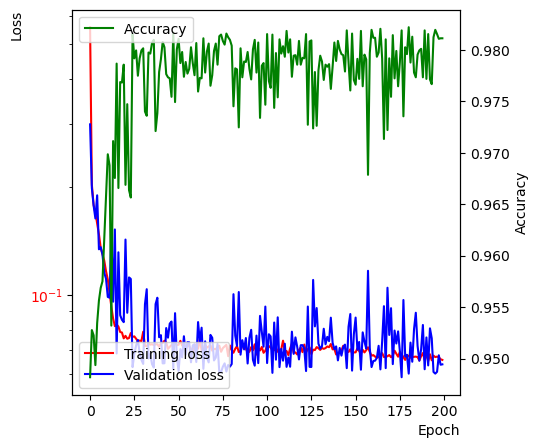

In [16]:
def draw_loss(data_train, data_val, data_acc, label="Loss"):
    """Plots the training and validation loss"""

    fig, ax1 = plt.subplots(figsize=(5, 5))
    ax1.set_xlabel("Epoch", horizontalalignment='right', x=1.0)
    ax1.set_ylabel("Loss", horizontalalignment='right', y=1.0)
    ax1.set_yscale('log')
    ax1.tick_params(axis='y', labelcolor='red')
    ax1.plot(data_train,
             color='red',
             label='Training loss')
    ax1.plot(data_val,
             color='blue',
             label='Validation loss')
    ax2 = ax1.twinx()
    ax2.set_ylabel('Accuracy', color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    ax2.plot(data_acc,
             color='green',
             label='Accuracy')
    ax1.legend(loc='lower left')
    ax2.legend(loc='upper left')
    # plt.tight_layout()
    plt.savefig('imgs/cls-loss.png')
    plt.show()

draw_loss(tag_train_loss, tag_val_loss, tag_val_acc)

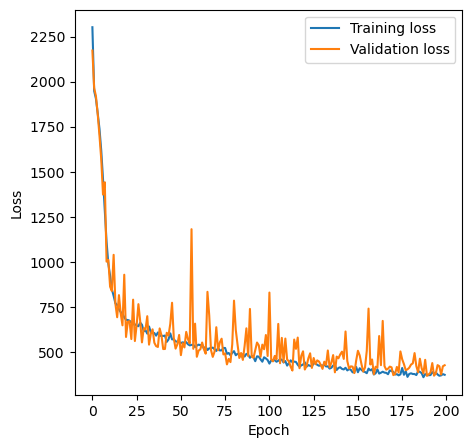

In [17]:
plt.figure(figsize=(5, 5))
plt.plot(reg_train_loss, label='Training loss')
plt.plot(reg_val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# plt.tight_layout()
plt.savefig('imgs/reg-loss.png')
plt.show()

In [18]:
from sklearn.metrics import accuracy_score

net.eval()
pred_hotid, y_pred = net(torch.tensor(X_test).float())

print("Accuracy for the test set: {0:.4f}".format(
    accuracy_score(
        np.argmax(hotid_test, axis=1),
        torch.argmax(pred_hotid, dim=-1).squeeze().numpy())
))

Accuracy for the test set: 0.9805


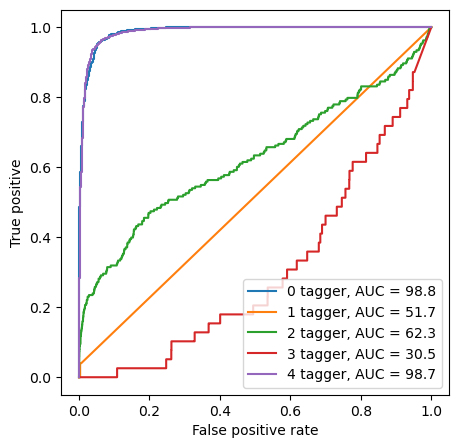

In [19]:
from sklearn.metrics import roc_curve, auc

def plot_roc(y_test, y_pred, labels):
    for x in range(5):        
        fpr, tpr, _ = roc_curve(y_test[:, x], y_pred[:, x])
        plt.plot(fpr, tpr, label='{0} tagger, AUC = {1:.1f}'.format(labels[0][x], auc(fpr, tpr)*100.), linestyle='-')
    # plt.semilogy()
    plt.xlabel("False positive rate")
    plt.ylabel("True positive")
    # plt.ylim(0.001, 1)
    # plt.grid(True)
    plt.legend(loc='lower right')  
    
plt.figure(figsize=(5, 5))
plot_roc(hotid_test, pred_hotid.squeeze().detach().numpy(), ohe.categories_)
plt.savefig('imgs/roc-curve.png')

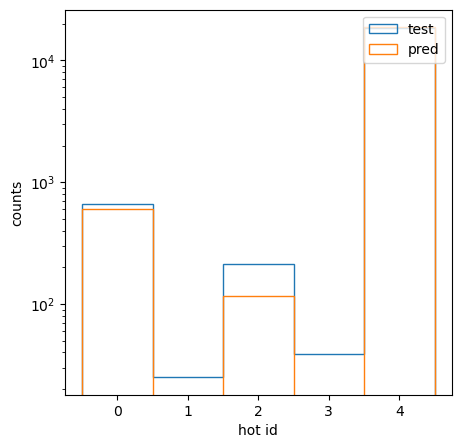

In [20]:
pred_hotid = torch.argmax(pred_hotid, dim=-1).squeeze().detach().numpy()
hotid_test = np.argmax(hotid_test, axis=1)

plt.figure(figsize=(5, 5))
plt.hist(hotid_test, histtype='step', bins=5, range=(-0.5, 4.5), label='test')
plt.hist(pred_hotid, histtype='step', bins=5, range=(-0.5, 4.5), label='pred')
plt.xlabel('hot id')
plt.ylabel('counts')
plt.legend()
plt.yscale('log')
# plt.tight_layout()
plt.savefig('imgs/cls-hot-id.png')
plt.show()

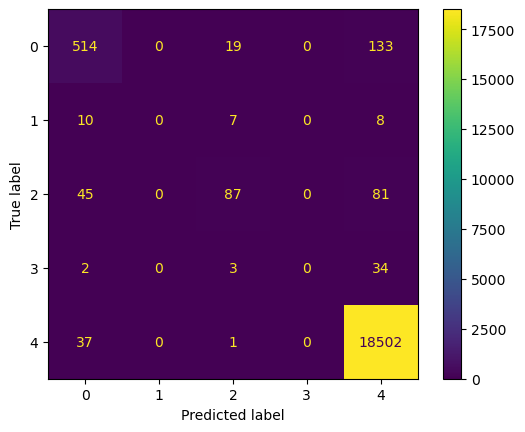

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(hotid_test, pred_hotid, labels=ohe.categories_[0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ohe.categories_[0])
disp.plot()
# disp.invert_yaxis()
plt.savefig('imgs/cls-cm.png')
plt.show()

In [22]:
def plot_reg(test_data, pred_data, label_x, nbin, bin_range):
    plt.figure(figsize=(5, 5))
    plt.hist(test_data, label='Test data', histtype='step', bins=nbin, range=bin_range)
    plt.hist(pred_data, label='Prediction data', histtype='step', bins=nbin, range=bin_range)
    plt.ylabel('counts')
    plt.xlabel(label_x)
    plt.yscale('log')
    plt.legend()
    # plt.tight_layout()
    plt.savefig("imgs/"+label_x+".png")
    plt.show()

In [23]:
pred_y = y_pred.squeeze().detach().numpy()

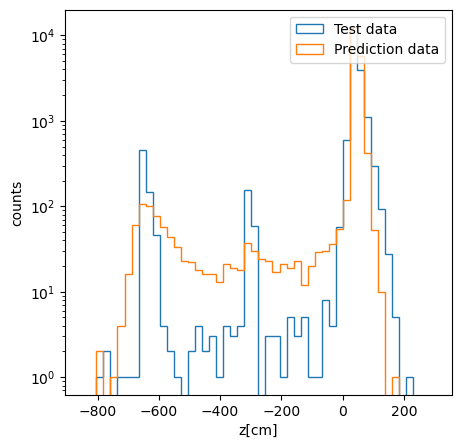

In [24]:
plot_reg(y_test[:, 2], pred_y[:, 2], 'z[cm]', 50, [-850., 300.])

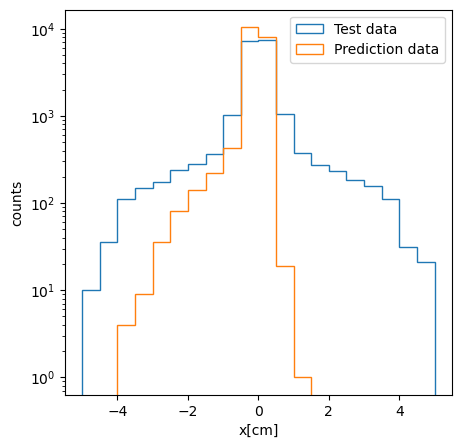

In [25]:
plot_reg(y_test[:, 0], pred_y[:, 0], 'x[cm]', 20, [-5., 5.])

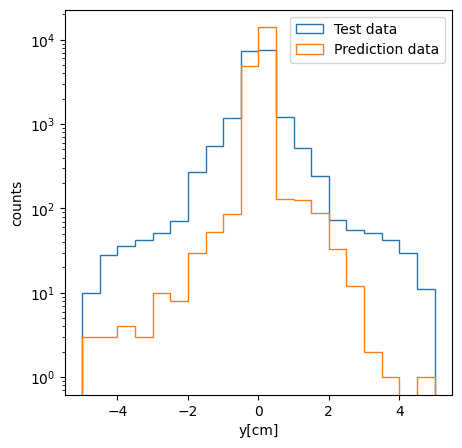

In [26]:
plot_reg(y_test[:, 1], pred_y[:, 1], 'y[cm]', 20, [-5., 5.])

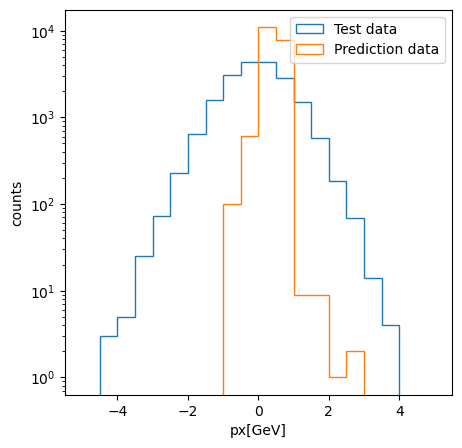

In [27]:
plot_reg(y_test[:, 3], pred_y[:, 3], 'px[GeV]', 20, [-5., 5.])

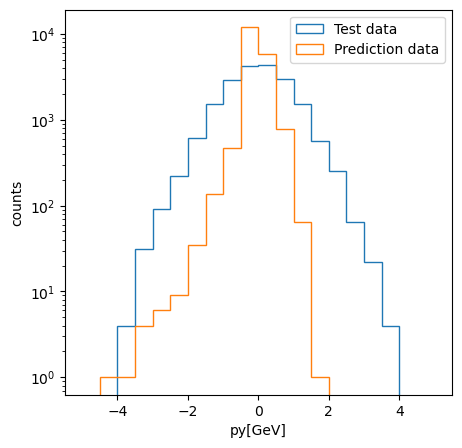

In [28]:
plot_reg(y_test[:, 4], pred_y[:, 4], 'py[GeV]', 20, [-5., 5.])

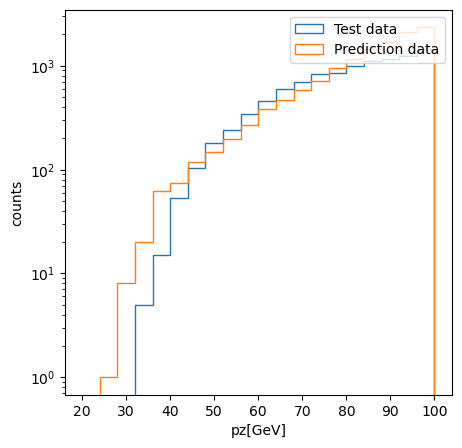

In [29]:
plot_reg(y_test[:, 5], pred_y[:, 5], 'pz[GeV]', 20, [20., 100.])

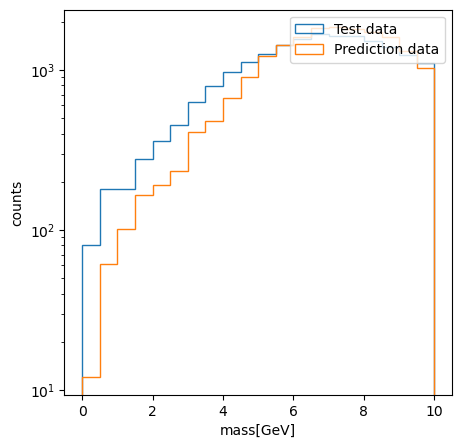

In [30]:
plot_reg(y_test[:, 6], pred_y[:, 6], 'mass[GeV]', 20, [0., 10.])

In [31]:
mp = 0.938
ebeam = 120.

p_beam = ak.zip({
    "px": 0.,
    "py": 0.,
    "pz": np.sqrt(ebeam*ebeam - mp*mp),
    "energy": ebeam,
}, with_name="Momentum4D")

p_target = ak.zip({
    "px": 0.,
    "py": 0.,
    "pz": 0.,
    "energy": mp,
}, with_name="Momentum4D")

In [32]:
p_sum = ak.zip({
    "px": pred_y[:, 3],
    "py": pred_y[:, 4],
    "pz": pred_y[:, 5],
    "mass": pred_y[:, 6],
}, with_name="Momentum4D")

p_cms = p_beam + p_target

In [33]:
x1 = (p_target@p_sum)/(p_target@p_cms)
x2 = (p_beam@p_sum)/(p_beam@p_cms)

s = p_cms.tau2
bv_cms = p_cms.to_beta3()
p_boost = p_sum.boost(-bv_cms)
xF = 2.*p_boost.pz/np.sqrt(s)/(1. - p_sum.mass*p_sum.mass/s)

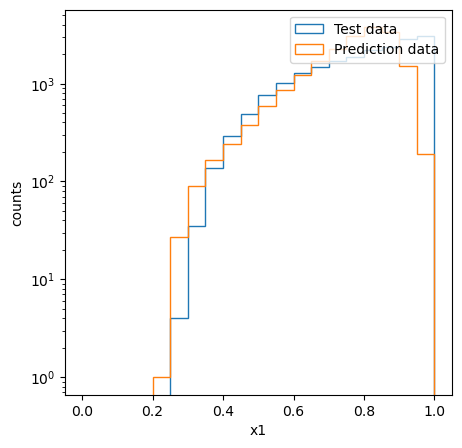

In [34]:
plot_reg(y_test[:, 7], x1, 'x1', 20, [0., 1.])

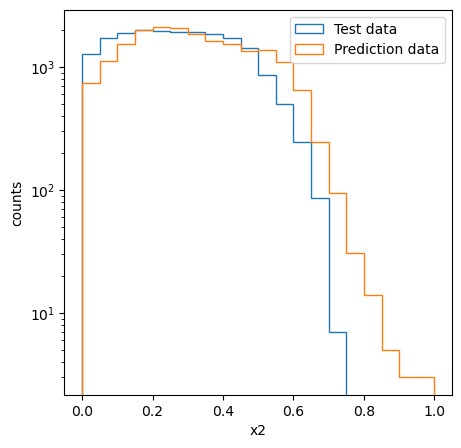

In [35]:
plot_reg(y_test[:, 8], x2, 'x2', 20, [0., 1.])

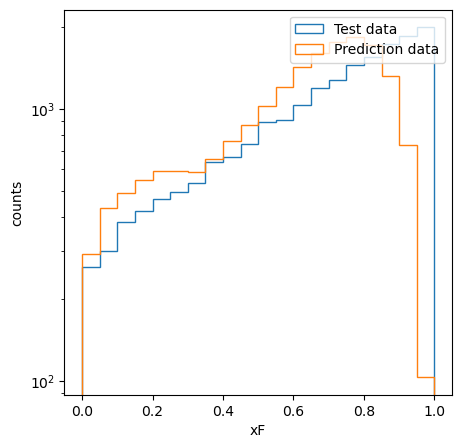

In [36]:
plot_reg(y_test[:, 9], xF, 'xF', 20, [0., 1.])

In [37]:
total_trainable_params = sum(p.numel() for p in net.parameters())
print('total trainable params:', total_trainable_params)

total trainable params: 7132
